# Übungsblatt 12

Lernziele:
- Merkmalstransformationen (PCA / LDA)
- Korrelationen erkennen


Schritt 1: Lesen Sie die Trainings-Daten aus 'data/2d_samples_4cl_train.csv' ein!

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv("data/2d_samples_4cl_train.csv")
df_train

,x1,x2,Label
0,25.5428,8.12002,A
1,28.7852,10.51880,A
2,31.1303,9.20584,B
3,31.1073,9.47408,B
4,31.2040,9.33927,B
...,...,...,...
1995,29.6667,11.06620,A
1996,27.5088,10.48770,A
1997,26.6341,5.35673,D
1998,30.6132,4.39621,C


Schritt 2: Transformieren Sie die Daten mit Hilfe der Hauptachsentransformation.

In [6]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()
pca.fit(df_train[["x1", "x2"]])

PCA()

In [10]:
pca.explained_variance_ratio_

array([0.69429477, 0.30570523])

In [16]:
train_transformed = pca.transform(df_train[["x1", "x2"]])
train_transformed

array([[-2.9072997 , -1.92986819],
       [ 1.09591071, -1.43833012],
       [ 1.89344088,  1.12824417],
       ...,
       [-4.01756777,  0.82585534],
       [-1.79209202,  4.26141834],
       [ 3.29133449, -1.27610659]])

Schritt 3: Erstellen Sie ein Scatterplot der transformierten Daten!

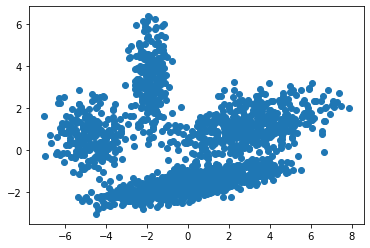

In [18]:
plt.scatter(train_transformed[:,0], train_transformed[:, 1])
plt.show()

Schritt 4: Berechnen Sie den Pearson Korrelations-Koeffizienten und den p-Wert für die beiden Merkmale $x_1$ und $x_2$. Sind die Merkmale korreliert? Begründen Sie Ihre Antwort! (Hinweis: Die Berechnung finden Sie im Paket scipy.stats)

In [20]:
from scipy import stats

In [23]:
stats.pearsonr(df_train.values[:,0], df_train.values[:,1])

(0.3881340770978398, 6.606705058577771e-73)

Ja, sind korreliert, weil Pearson Korrelationskoeffizient $ = 0.388 > 0$

Schritt 5: Lesen Sie zwei neue Merkmale $x_3$ und $x_4$ aus aus 'data/new_features.csv' ein!

In [19]:
df_new_features = pd.read_csv("data/new_features.csv")
df_new_features

,x3,x4
0,-5.784599,0.367219
1,2.721821,1.358629
2,3.886882,0.023929
3,4.432764,-0.739563
4,4.327488,-0.525640
...,...,...
1995,5.024306,-0.007395
1996,0.587112,0.410173
1997,-7.845136,0.302578
1998,-2.844184,1.678180


Schritt 6: Berechnen Sie für jedes Paar $(x_i,x_j)$ aus den alten Merkmalen $x_1$ und $x_2$ und den neuen Merkmalen $x_3$ und $x_4$ den Spearman Korrelationskoeffizienten

$x1$ und $x2$

In [58]:
stats.spearmanr(df_train.values[:,0], df_train.values[:,1])

SpearmanrResult(correlation=0.4525482473094023, pvalue=1.4826026352320876e-101)

$x1$ und $x3$

In [52]:
stats.spearmanr(df_train.values[:,0], df_new_features.values[:,0])

SpearmanrResult(correlation=0.8155280385275849, pvalue=0.0)

$x1$ und $x4$

In [57]:
stats.spearmanr(df_train.values[:,0], df_new_features.values[:,1])

SpearmanrResult(correlation=0.01673103283961164, pvalue=0.45456928316210277)

$x2$ und $x3$

In [56]:
stats.spearmanr(df_train.values[:,1], df_new_features.values[:,0])

SpearmanrResult(correlation=0.853329924092458, pvalue=0.0)

$x2$ und $x4$

In [55]:
stats.spearmanr(df_train.values[:,1], df_new_features.values[:,1])

SpearmanrResult(correlation=-0.005149397822107891, pvalue=0.8179786120778193)

$x3$ und $x4$

In [54]:
stats.spearmanr(df_new_features.values[:,0], df_new_features.values[:,1])

SpearmanrResult(correlation=0.008332739083184769, pvalue=0.7095765089639128)

Schritt 7: Geben Sie die Korrelationsmatrix und die p-Werte aus.

In [25]:
df_train.corr()

,x1,x2
x1,1.000000,0.388134
x2,0.388134,1.000000


In [28]:
np.corrcoef(train_transformed)

array([[ 1., -1., -1., ...,  1.,  1., -1.],
       [-1.,  1.,  1., ..., -1., -1.,  1.],
       [-1.,  1.,  1., ..., -1., -1.,  1.],
       ...,
       [ 1., -1., -1., ...,  1.,  1., -1.],
       [ 1., -1., -1., ...,  1.,  1., -1.],
       [-1.,  1.,  1., ..., -1., -1.,  1.]])

In [29]:
pd.DataFrame(train_transformed).corr()

,0,1
0,1.000000e+00,1.016769e-16
1,1.016769e-16,1.000000e+00


In [70]:
pd.merge(df_train[["x1", "x2"]], df_new_features, left_index=True, right_index=True).corr(method="pearson")

,x1,x2,x3,x4
x1,1.000000,0.388134,0.845124,0.024290
x2,0.388134,1.000000,0.818635,0.000048
x3,0.845124,0.818635,1.000000,0.015289
x4,0.024290,0.000048,0.015289,1.000000


In [71]:
pd.merge(df_train[["x1", "x2"]], df_new_features, left_index=True, right_index=True).corr(method="spearman")

,x1,x2,x3,x4
x1,1.000000,0.452548,0.815528,0.016731
x2,0.452548,1.000000,0.853330,-0.005149
x3,0.815528,0.853330,1.000000,0.008333
x4,0.016731,-0.005149,0.008333,1.000000


Schritt 8: Welches Merkmal ist überflüssig?

$x3$